In [85]:
from ilp_solver import ilp_solver_pulp
from config import Config
from integer_linear_problem import Ilp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output
from tqdm import tqdm
import functools

In [86]:
@functools.cache
def get_solve_time(end):
    sol = ilp_solver_pulp(get_ilp(end), False)
    return sol.timer.end_time - sol.timer.start_time

100%|██████████| 9/9 [29:28<00:00, 196.50s/it]


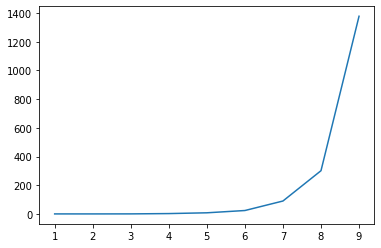

In [89]:
%matplotlib inline

MAX_END = 10

ilp = Ilp.from_excel(Config().DATA_LARGE_PATH)

def get_ilp(end):
    N = set(range(1, end + 1))
    w = pd.DataFrame.from_dict(ilp.w).iloc[:end, :end].to_dict()
    c = pd.DataFrame.from_dict(ilp.c).iloc[:end, :end].to_dict()
    f = pd.Series(ilp.f)[:end].to_dict()

    return Ilp(N, ilp.collection, ilp.transfer, ilp.distribution, w, c, f)

tc_x = np.arange(1, MAX_END, 1)
solving_times = []
for end in tqdm(range(1, MAX_END)):
    solving_times.append(get_solve_time(end))
    clear_output() # flush standard output
plt.plot(tc_x, solving_times)
plt.show()

C:\Users\Thom van den Hil\AppData\Local\Temp\ipykernel_24992\2358254624.py:8: RuntimeWarning: overflow encountered in power
  return a * (x) ** (x) ** (x)


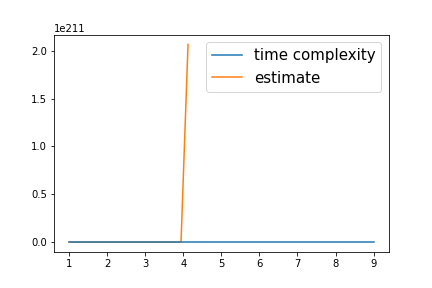

[1.]


In [119]:
%matplotlib widget

ALPHABET = list('abcdefghijklmnopqrstuvwxyz')

# def objective(x, a, b, c, d):
#     return a * b**x * c * x * d * x**2
def objective(x, a):
    return a * (x) ** (x) ** (x)
# def objective(x, a):
#     return np.sqrt(2 * np.pi * a*x) * (a*x / np.e) ** (a*x)
# def objective(x, a, b, c, d, e, f):
#     return a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5

plt.plot(tc_x, solving_times, label='time complexity', zorder=3)

popt, _ = curve_fit(objective, tc_x, solving_times)
# x_arr = np.arange(min(tc_x), max(tc_x) + 1, 1)
x_arr = np.linspace(min(tc_x), 10)
y_arr = objective(x_arr, *popt)
plt.plot(x_arr, y_arr, label='estimate')
plt.legend(fontsize=15)
plt.show()

# estimate_func_1_lst = []
# estimate_func_2_lst = []
# for index, (coef, val) in enumerate(zip(ALPHABET, popt)):
#     print(f'{coef} = {val}')
#     estimate_func_1_lst.append(f'{val} * x^{index}')
#     estimate_func_2_lst.append(f'{val} * x**{index}')
# estimate_func_str_1 = ' + '.join(estimate_func_1_lst)
# estimate_func_str_2 = ' + '.join(estimate_func_2_lst)
# print(f'{estimate_func_str_1 = }')
# print(f'{estimate_func_str_2 = }')

# a, b = popt
# print(f'a = {popt[0]}', f'b = {popt[1]}')

print(popt)

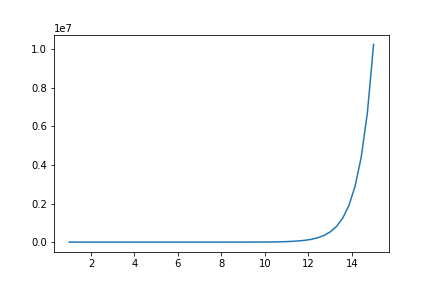

x = 15, y = 10243928.427417291


In [96]:
%matplotlib widget

x_arr = np.linspace(1, 15)
# y_arr = eval(estimate_func_str_2, {'x': x_arr})
y_arr = a * b ** x_arr
plt.plot(x_arr, y_arr)
plt.show()

x = 15
print(f'x = {x}, y = {y_arr[int(np.floor(50/15 * x) - 1)]}') # not accurate

In [106]:
print(f'{solving_times = }')

ratio_arr = np.zeros((len(solving_times) - 1,))

for index, (time_1, time_2) in enumerate(zip(solving_times[:-1], solving_times[1:])):
    ratio_arr[index] = time_2 / time_1

print(ratio_arr)
print(np.average(ratio_arr))

solving_times = [0.14015680004376918, 0.10561990004498512, 0.3576669000321999, 2.468282599991653, 7.864080100029241, 23.777121899998747, 90.01015810004901, 301.1262130999821, 1377.2157790999627]
[0.75358384 3.38635901 6.90106521 3.18605337 3.02350963 3.78557836
 3.34546922 4.57354996]
3.6193960741648232


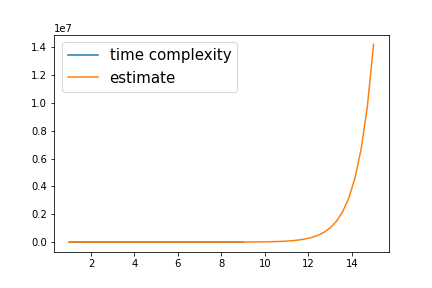

x = 15, y = 14186421.93242807


In [109]:
%matplotlib widget

plt.plot(tc_x, solving_times, label='time complexity')

# x_arr = np.arange(min(tc_x), max(tc_x) + 1, 1)
# x_arr = np.linspace(min(tc_x), max(tc_x))
x_max = 15
x_arr = np.linspace(1, x_max)
y_arr = solving_times[0] * 3.730819111280267 ** (x_arr - 1)
plt.plot(x_arr, y_arr, label='estimate')
plt.legend(fontsize=15)
plt.show()

x = 15
print(f'x = {x}, y = {y_arr[int(np.floor(50/x_max * x) - 1)]}') # not accurate